In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Combine the separate prediction results to one result file
# load the data
thread_0 = pd.read_csv("0-test_batch_results-BindMHC2.csv")
thread_1 = pd.read_csv("1-test_batch_results-BindMHC2.csv")
thread_2 = pd.read_csv("2-test_batch_results-BindMHC2.csv")
thread_3 = pd.read_csv("3-test_batch_results-BindMHC2.csv")
batch_2 = pd.read_csv("test_batch_2_results-BindMHC2.csv")

# check for overlap (we want none)
check_overlap = set(thread_0['Peptides']) & set(thread_1['Peptides']) & set(thread_2['Peptides']) & set(thread_2['Peptides']) & set(batch_2['Peptides'])
#print(check_overlap)
# combine the datasets
batch_1 = pd.concat([thread_0, thread_1, thread_2, thread_3, batch_2])
batch_1 = batch_1.reset_index(drop=True)
batch_1.to_csv("batch_0-80_results-BindMHC2.csv", index=False)

In [30]:
# Combine the different prediction result batches
batch_1 = pd.read_csv("batch_0-80_results-BindMHC2.csv")
batch_2 = pd.read_csv("batch_80-120_results-BindMHC2.csv")
complete = pd.concat([batch_1, batch_2])
complete = complete.reset_index(drop=True)
print(complete)

     Peptides  netmhciipan_el_HLA_DRB1_01_01  netmhciipan_el_HLA_DRB1_03_01  \
0      115680                          20.46                           7.54   
1      115759                          71.07                          47.38   
2      115809                        5221.76                         881.60   
3      115843                         207.18                          19.53   
4      115867                          94.76                          99.07   
..        ...                            ...                            ...   
115    117369                          74.00                          78.00   
116    117400                          60.82                           8.58   
117    117477                          65.80                          17.31   
118    117555                          92.34                          94.65   
119    117594                          62.62                         131.43   

     netmhciipan_el_HLA_DRB1_04_01  netmhciipan_el_

In [31]:
check_overlap = set(batch_1['Peptides']) & set(batch_2['Peptides'])
print(check_overlap)

set()


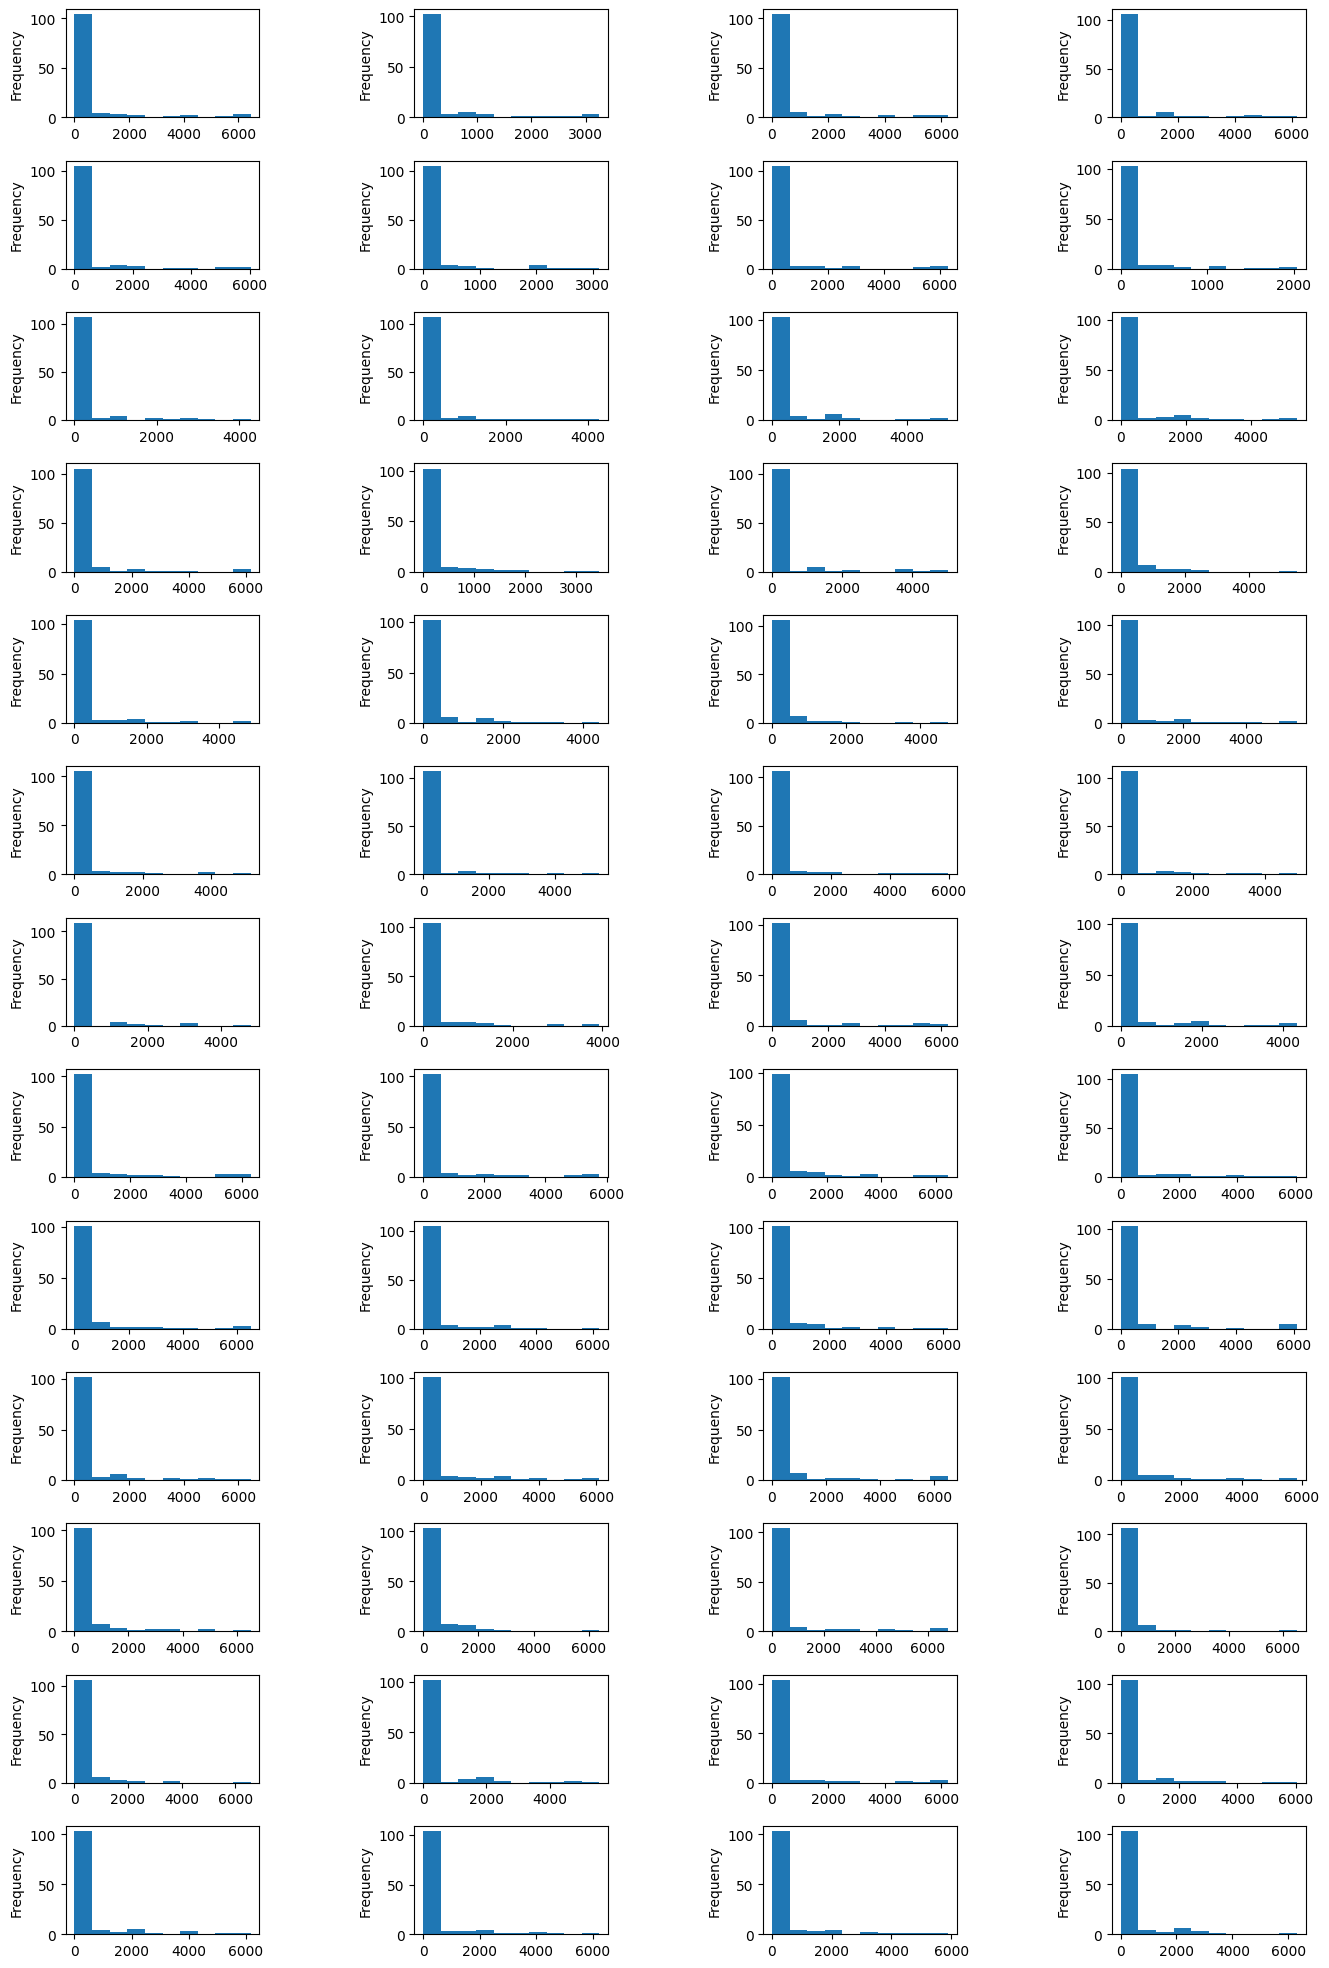

In [71]:
# Plot Histogram of adjusted rank values for each allele
alleles = list(complete.columns)
alleles = alleles[1:len(alleles)]

column = 1
row = 1
plt.figure(figsize=(16,25))
plt.subplots_adjust(wspace=0.8, hspace=0.4)
for allele in alleles:
    plt.subplot(13, 4, column)
    complete[allele].plot.hist()
    column += 1

    